# California-Housing-Prices

In [7]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

housing = pd.read_csv('data/housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [10]:
# Save Graph Image
IMAGES_PATH = Path() / 'images/' 'end-to-end-project'
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension='png' , resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path , format=fig_extension , dpi=resolution)
        

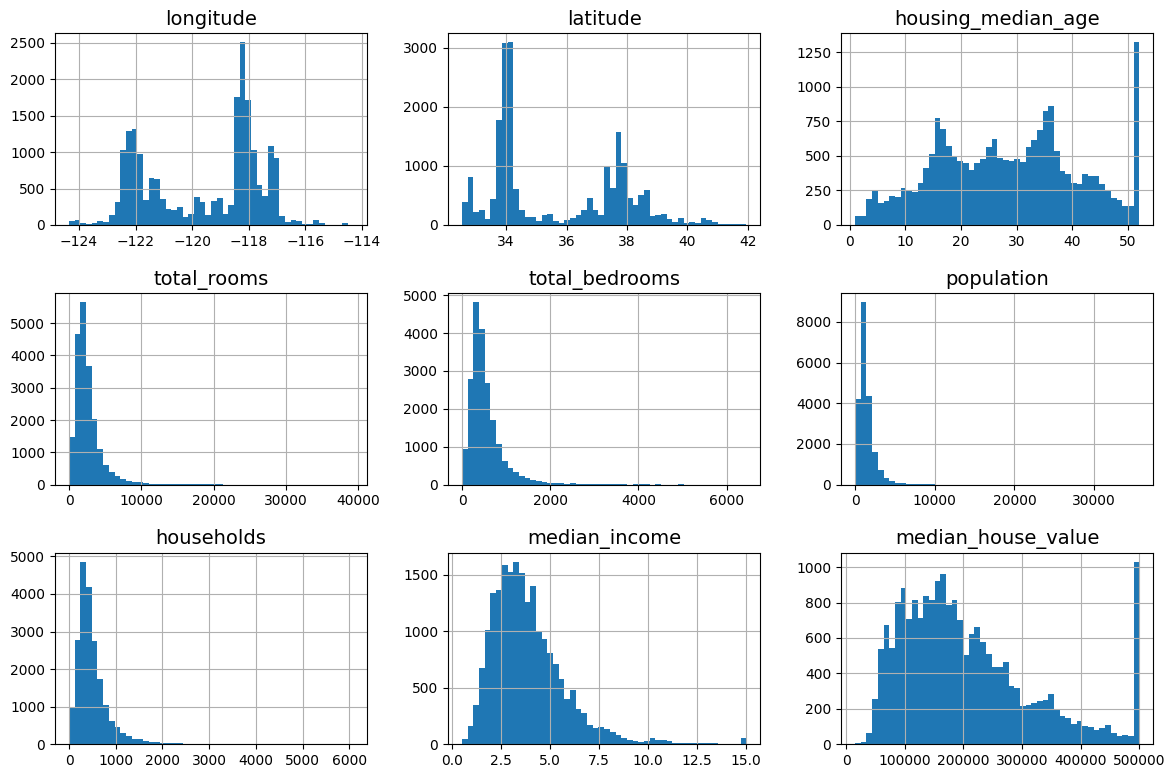

In [22]:
# Display Graph

plt.rc('font', size=14)
plt.rc('axes', labelsize=14 , titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

housing.hist(bins=50, figsize=(12,8))
save_fig('attribute_histogram_plots')
plt.show()

In [35]:
# Create Test Set
np.random.seed(42)

def  shuffle_and_split_data(data , test_radio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_radio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set = shuffle_and_split_data(housing, 0.2)
len(train_set)

16512

In [5]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size = 0.2 , random_state = 42)
print(f"len(train_set) = {len(train_set)} , len(test_set) = {len(test_set)}")

len(train_set) = 16512 , len(test_set) = 4128


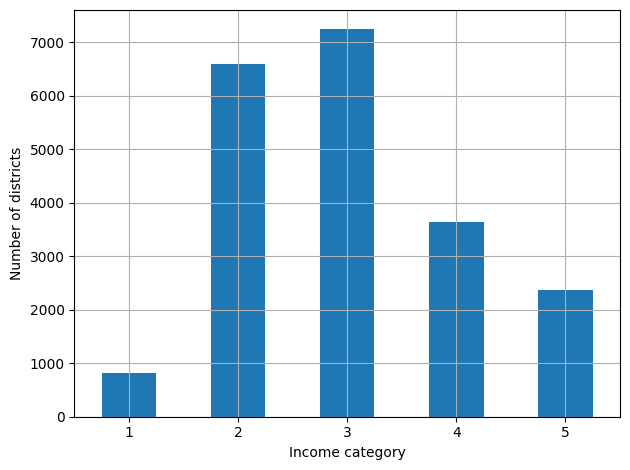

In [11]:
housing['income_cat'] = pd.cut(housing['median_income'] , bins=[0. , 1.5 , 3.0 , 4.5 , 6 , np.inf], labels = [1, 2 , 3 , 4 , 5])

housing['income_cat'].value_counts().sort_index().plot.bar(rot=0 , grid=True) 
plt.xlabel('Income category')
plt.ylabel('Number of districts')
save_fig('hosing_income_car_plot_bar')
plt.show()

In [14]:
strat_train_set , start_test_set = train_test_split(housing, test_size = 0.2 , random_state = 42 , stratify=housing['income_cat'])


income_cat
3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: count, dtype: float64

In [16]:
start_test_set['income_cat'].value_counts() / len(start_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [15]:
strat_train_set['income_cat'].value_counts() / len(strat_train_set)

income_cat
3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: count, dtype: float64

In [18]:
# Discover and Visualize the data to Gain insights

housing = strat_train_set.copy()
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 12655 to 19773
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           16512 non-null  float64 
 1   latitude            16512 non-null  float64 
 2   housing_median_age  16512 non-null  float64 
 3   total_rooms         16512 non-null  float64 
 4   total_bedrooms      16354 non-null  float64 
 5   population          16512 non-null  float64 
 6   households          16512 non-null  float64 
 7   median_income       16512 non-null  float64 
 8   median_house_value  16512 non-null  float64 
 9   ocean_proximity     16512 non-null  object  
 10  income_cat          16512 non-null  category
dtypes: category(1), float64(9), object(1)
memory usage: 1.4+ MB


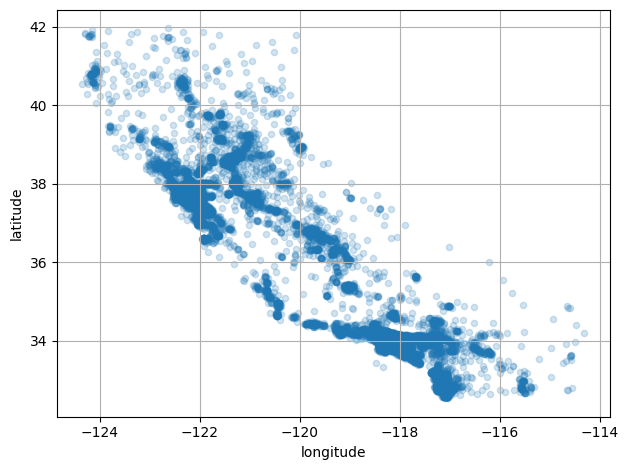

In [20]:
housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude',grid=True , alpha = 0.2)
save_fig('bad_visualization_plot')
plt.show()

<Axes: xlabel='longitude', ylabel='latitude'>

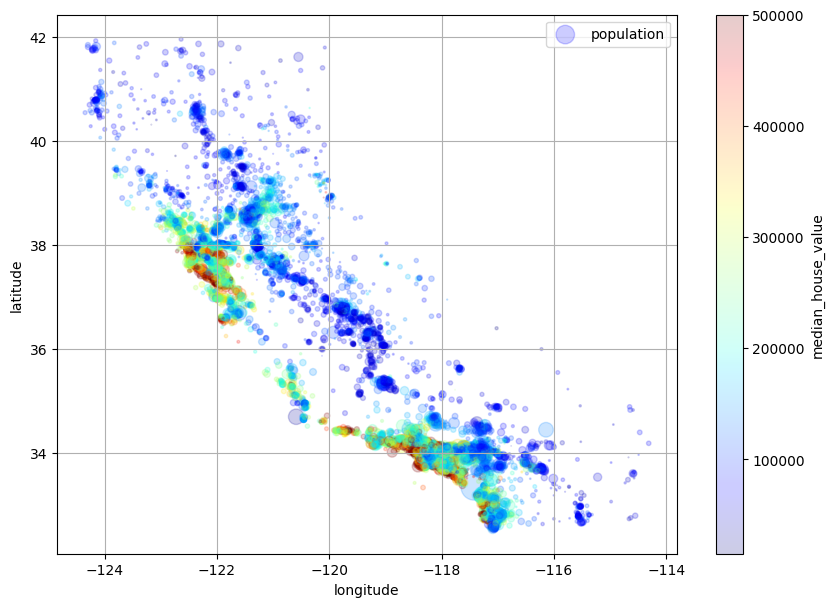

In [21]:
housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude',grid=True , alpha = 0.2 , s=housing['population']  / 100 , label="population" , c='median_house_value' , cmap='jet' , colorbar=True , legend = True , sharex=False , figsize=(10,7) )

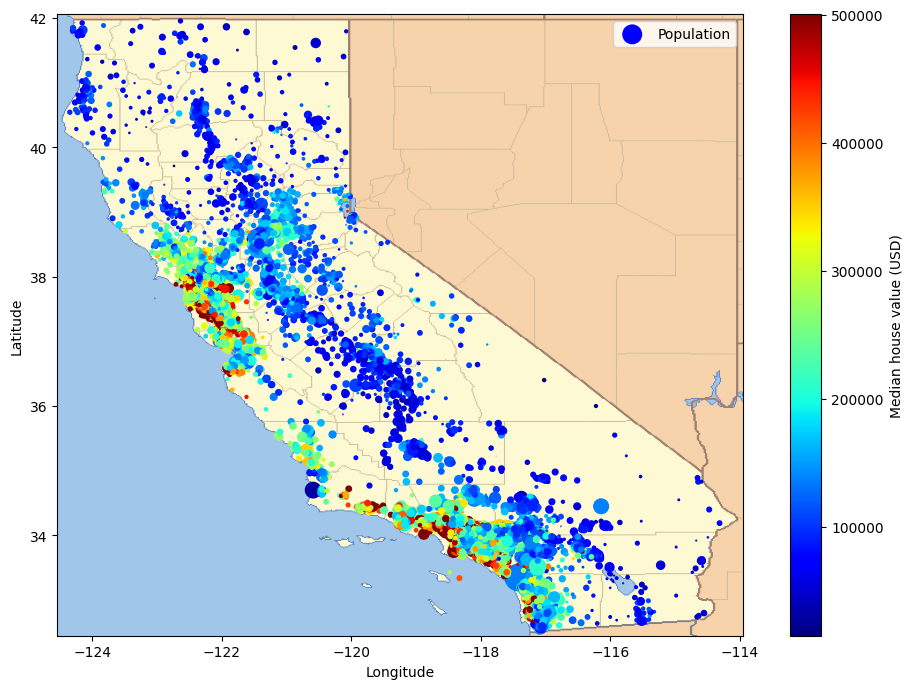

In [23]:
import urllib.request

# Download the California image
filename = "california.png"
if not (IMAGES_PATH / filename).is_file():
    root_url = "https://github.com/ageron/handson-ml3/raw/main/"
    url = root_url + "images/end_to_end_project/" + filename
    print("Downloading", filename)
    urllib.request.urlretrieve(url, IMAGES_PATH / filename)

# Rename columns in the housing DataFrame
housing_renamed = housing.rename(columns={
    "latitude": "Latitude", "longitude": "Longitude",
    "population": "Population",
    "median_house_value": "Median house value (USD)"
})

# Plot the housing data
housing_renamed.plot(
    kind="scatter", x="Longitude", y="Latitude",
    s=housing_renamed["Population"] / 100, label="Population",
    c="Median house value (USD)", cmap="jet", colorbar=True,
    legend=True, sharex=False, figsize=(10, 7))

# Load and display the California image
california_img = plt.imread(IMAGES_PATH / filename)
axis = (-124.55, -113.95, 32.45, 42.05)
plt.axis(axis)
plt.imshow(california_img, extent=axis)

# Save the figure
save_fig("california_housing_prices_plot")
plt.show()

In [24]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

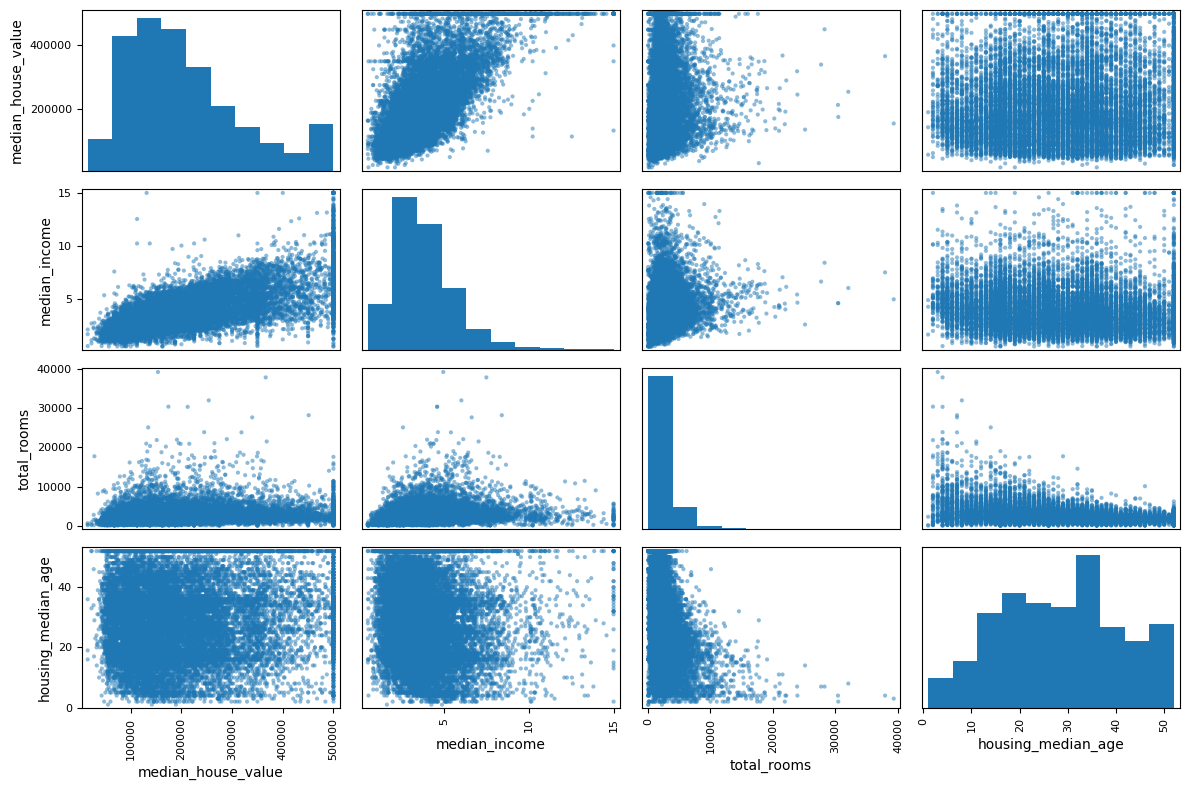

In [25]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")  # extra code
plt.show()

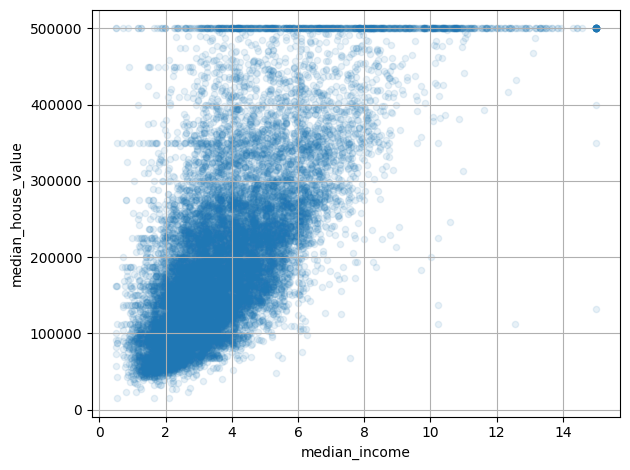

In [26]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1, grid=True)
save_fig("income_vs_house_value_scatterplot")  # extra code
plt.show()

In [33]:
#Experimenting with Attribute Combinations

housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["people_per_house"] = housing["population"] / housing["households"]

In [27]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

In [32]:
housing, housing_labels = strat_train_set.drop(columns="median_house_value"), strat_train_set["median_house_value"]

In [31]:
# Alternative way to prepare training set with features and labels
housing = strat_train_set.loc[:, strat_train_set.columns != 'median_house_value']
housing_labels = strat_train_set.loc[:, 'median_house_value']

In [72]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16354 entries, 12655 to 19773
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           16354 non-null  float64 
 1   latitude            16354 non-null  float64 
 2   housing_median_age  16354 non-null  float64 
 3   total_rooms         16354 non-null  float64 
 4   total_bedrooms      16354 non-null  float64 
 5   population          16354 non-null  float64 
 6   households          16354 non-null  float64 
 7   median_income       16354 non-null  float64 
 8   ocean_proximity     16354 non-null  object  
 9   income_cat          16354 non-null  category
 10  rooms_per_house     16354 non-null  float64 
 11  bedrooms_ratio      16354 non-null  float64 
 12  people_per_house    16354 non-null  float64 
dtypes: category(1), float64(11), object(1)
memory usage: 1.6+ MB


In [73]:
housing_labels.info()

<class 'pandas.core.series.Series'>
Index: 16512 entries, 12655 to 19773
Series name: median_house_value
Non-Null Count  Dtype  
--------------  -----  
16512 non-null  float64
dtypes: float64(1)
memory usage: 258.0 KB


In [75]:
# Check null value

null_row_idx = housing.isnull().any(axis=1)
housing.loc[null_row_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat,rooms_per_house,bedrooms_ratio,people_per_house


In [70]:
# Cleaning missed data

median = housing["total_bedrooms"].median()  # Calculate median
housing["total_bedrooms"].fillna(median)  # Replace NaN with median


12655     797.0
15502     855.0
2908      310.0
14053     519.0
20496     646.0
          ...  
15174    1231.0
12661    1422.0
19263     166.0
19140     580.0
19773     222.0
Name: total_bedrooms, Length: 16354, dtype: float64

In [55]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

In [52]:
housing_num = housing.select_dtypes(include = np.number)

In [53]:
housing_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16354 entries, 12655 to 19773
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16354 non-null  float64
 1   latitude            16354 non-null  float64
 2   housing_median_age  16354 non-null  float64
 3   total_rooms         16354 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16354 non-null  float64
 6   households          16354 non-null  float64
 7   median_income       16354 non-null  float64
 8   rooms_per_house     16354 non-null  float64
 9   bedrooms_ratio      16354 non-null  float64
 10  people_per_house    16354 non-null  float64
dtypes: float64(11)
memory usage: 1.5 MB


In [56]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [76]:
imputer.statistics_

array([-1.18510000e+02,  3.42600000e+01,  2.90000000e+01,  2.12000000e+03,
        4.33000000e+02,  1.16400000e+03,  4.08000000e+02,  3.54425000e+00,
        5.23418898e+00,  2.03027043e-01,  2.81709834e+00])

In [77]:
housing_num.median().values

array([-1.18510000e+02,  3.42600000e+01,  2.90000000e+01,  2.12000000e+03,
        4.33000000e+02,  1.16400000e+03,  4.08000000e+02,  3.54425000e+00,
        5.23418898e+00,  2.03027043e-01,  2.81709834e+00])

In [62]:
X = imputer.transform(housing_num)

In [60]:
imputer.feature_names_in_

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'rooms_per_house', 'bedrooms_ratio', 'people_per_house'],
      dtype=object)

In [63]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)

In [65]:
housing_tr.loc[null_row_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_house,bedrooms_ratio,people_per_house


In [66]:
imputer.strategy

'median'

In [67]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_house,bedrooms_ratio,people_per_house
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,5.485836,0.205784,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,6.927083,0.160714,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,5.393333,0.191595,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,3.886128,0.276505,1.859213
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,6.096552,0.182692,3.167241


In [68]:
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(random_state=42)
outlier_pred = isolation_forest.fit_predict(X)